#House prediction  

Project Goal 

my main goal is to predict house price by its location , no of house , no balcony ,area etc . Therse are some of the aspects of this house pridiction 

Libraries 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load  data 

In [9]:
house_prices_path =r"C:\Users\yvard\OneDrive\Desktop\House pridiction\house_prices.csv"


df_house_prices = pd.read_csv(house_prices_path)
print(df_house_prices.shape)



(187531, 21)


In [10]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [11]:
df_house_prices.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [12]:
df_house_prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [17]:
int_features = df_house_prices.select_dtypes(include=["int64"]).columns
print("int_features of df_house_prices is : ", int_features.shape[0])
print("the integer feature is ",int_features.tolist())


int_features of df_house_prices is :  1
the integer feature is  ['Index']


In [19]:
float_feature = df_house_prices.select_dtypes(include =["float64"]).columns
print("The float value of feature is ",float_feature.shape[0])
print("the float value of featue is",float_feature.tolist())

The float value of feature is  3
the float value of featue is ['Price (in rupees)', 'Dimensions', 'Plot Area']


In [21]:
object_feature = df_house_prices.select_dtypes(include=["object"]).columns
print("the object value is ",object_feature.shape[0])
print("the object value feature are ",object_feature.tolist())

the object value is  17
the object value feature are  ['Title', 'Description', 'Amount(in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area']


In [23]:
df_house_prices.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


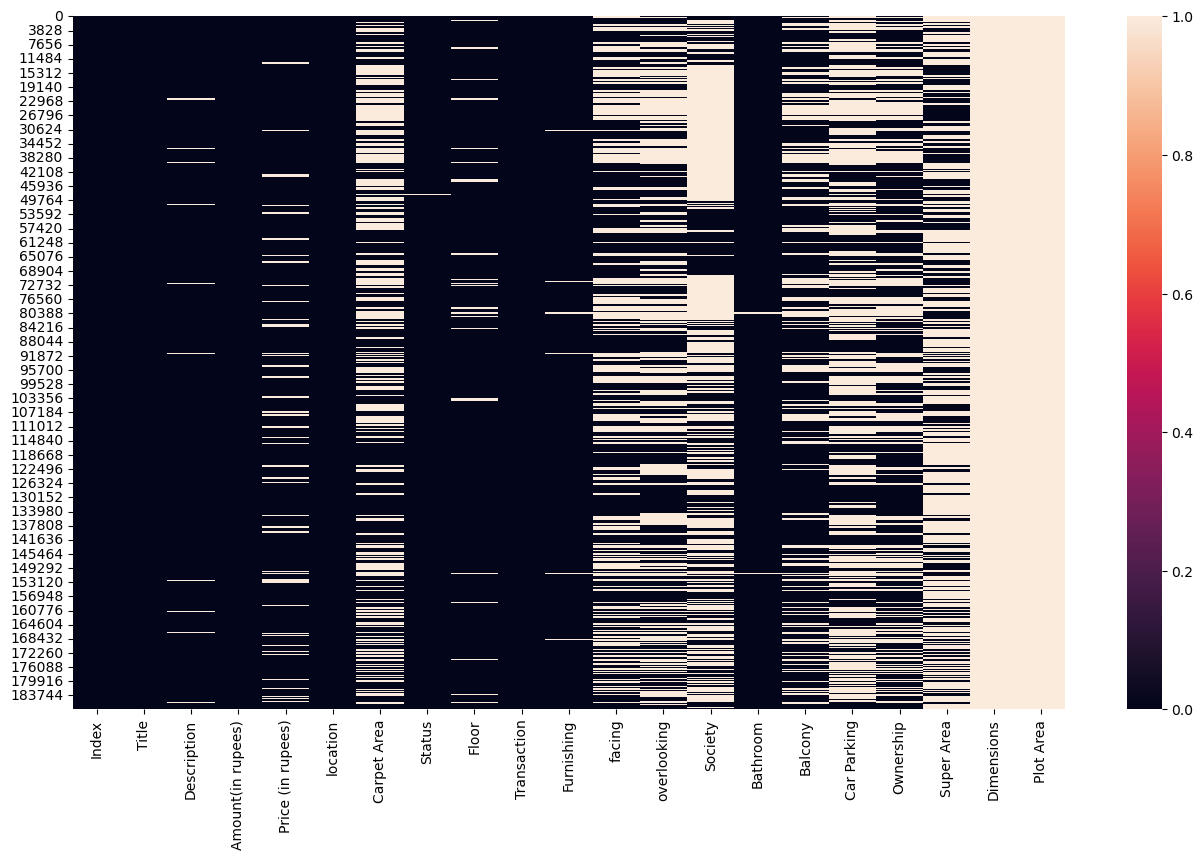

In [25]:
plt.figure(figsize =(16,9))
sns.heatmap(df_house_prices.isnull())
plt.savefig(r"EDA_image\heatmap_df_house_prices_of_null_value.png")


In [26]:
null_percent = df_house_prices.isnull().sum() / df_house_prices.shape[0]*100
null_percent


Index                  0.000000
Title                  0.000000
Description            1.612000
Amount(in rupees)      0.000000
Price (in rupees)      9.419776
location               0.000000
Carpet Area           43.018488
Status                 0.327946
Floor                  3.773776
Transaction            0.044259
Furnishing             1.544811
facing                37.451408
overlooking           43.425354
Society               58.485264
Bathroom               0.441527
Balcony               26.094352
Car Parking           55.114621
Ownership             34.936624
Super Area            57.422506
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

In [27]:
#in values ko rkhna hai
miss_value_50 = null_percent[null_percent>50]
miss_value_50

Society         58.485264
Car Parking     55.114621
Super Area      57.422506
Dimensions     100.000000
Plot Area      100.000000
dtype: float64

#Missing value imputation

In [29]:
miss_value_feat= null_percent[null_percent>0]
print("Total missing value feature is :",len(miss_value_feat))

Total missing value feature is : 17


In [30]:
obj_na_feat = miss_value_feat[miss_value_feat.keys().isin(object_feature)]
print("the total numbrer of object feature is  :",len(obj_na_feat))
obj_na_feat



the total numbrer of object feature is  : 14


Description     1.612000
Carpet Area    43.018488
Status          0.327946
Floor           3.773776
Transaction     0.044259
Furnishing      1.544811
facing         37.451408
overlooking    43.425354
Society        58.485264
Bathroom        0.441527
Balcony        26.094352
Car Parking    55.114621
Ownership      34.936624
Super Area     57.422506
dtype: float64

In [31]:
int_features = miss_value_feat[miss_value_feat.keys().isin(int_features)]
print("The total number of integer feature is : ",len(int_features))
int_features

The total number of integer feature is :  0


Series([], dtype: float64)

In [38]:
float_feature = miss_value_feat[miss_value_feat.keys().isin(float_feature)]
print("The total number of float is : ",len(float_feature))
float_feature

The total number of float is :  3


Price (in rupees)      9.419776
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

#Handeling Carpet data 

<Axes: xlabel='count', ylabel='Carpet Area'>

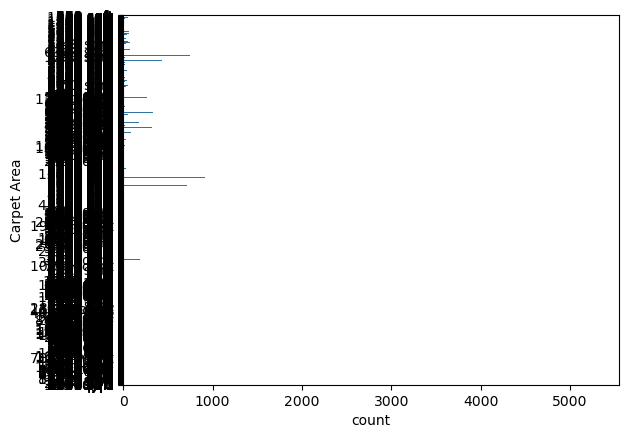

In [55]:
sns.countplot(df_house_prices["Carpet Area"])

In [ ]:
Carpet_Area_mode = df_house_prices["Carpet Area"].mode
df_house_prices["Carpet Area"].replace(np.nan,Carpet_Area_mode)